Name: Rohan Malve

Class: BE-B

Roll No.: 26

Course: Laboratory Practice-V (DL)

Practical No.: 07

Problem Statement: Classification using Deep neural network (Any One from the following)
1. Multiclass classification using Deep Neural Networks: Example: Use the OCR letter recognition dataset https://archive.ics.uci.edu/ml/datasets/letter+recognition
2. Binary classification using Deep Neural Networks Example: Classify movie reviews into positive" reviews and "negative" reviews, just based on the text content of the reviews.
Use IMDB dataset.

# Importing Required Packages and Modules

In [2]:
import numpy as np
from keras.datasets import imdb
from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics


import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Load the data, keeping only 10,000 of the most frequently occuring words
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

17464789/17464789 [==============================] - 0s 0us/step


In [4]:
# Check the first label
train_labels[0]

1

In [5]:
# Since we restricted ourselves to the top 10000 frequent words, no word index should exceed 10000
# we'll verify this below

# Here is a list of maximum indexes in every review --- we search the maximum index in this list of max indexes
print(type([max(sequence) for sequence in train_data]))

# Find the maximum of all max indexes
max([max(sequence) for sequence in train_data])

<class 'list'>


9999

In [6]:
# Let's quickly decode a review

# step 1: load the dictionary mappings from word to integer index
word_index = imdb.get_word_index()

# step 2: reverse word index to map integer indexes to their respective words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# Step 3: decode the review, mapping integer indices to words
#
# indices are off by 3 because 0, 1, and 2 are reserverd indices for "padding", "Start of sequence" and "unknown"
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])

decoded_review

1641221/1641221 [==============================] - 0s 0us/step


"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [7]:
len(reverse_word_index)

88584

# Preparing Data for Classification 
Vectorize the Input Data

In [8]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))    # Creates an all zero matrix of shape (len(sequences),10K)
    for i,sequence in enumerate(sequences):
        results[i,sequence] = 1                        # Sets specific indices of results[i] to 1s
    return results

# Vectorize training Data
X_train = vectorize_sequences(train_data)

# Vectorize testing Data
X_test = vectorize_sequences(test_data)

In [9]:
X_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [10]:
X_train.shape

(25000, 10000)

Vectorize the Labels

In [11]:
y_train = np.asarray(train_labels).astype('float32')
y_test  = np.asarray(test_labels).astype('float32')

# Model Definition

In [12]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# Compiling the Model

In [13]:
model.compile(
    optimizer=optimizers.RMSprop(learning_rate=0.001),
    loss = losses.binary_crossentropy,
    metrics = [metrics.binary_accuracy]
)

# Setting Up validation

In [14]:
# Input for Validation
X_val = X_train[:10000]
partial_X_train = X_train[10000:]

# Labels for validation
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

# Training Our Model

In [15]:
history = model.fit(
    partial_X_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(X_val, y_val)
)

Epoch 1/20
30/30 [==============================] - 3s 62ms/step - loss: 0.5401 - binary_accuracy: 0.7745 - val_loss: 0.4508 - val_binary_accuracy: 0.8075
Epoch 2/20
30/30 [==============================] - 1s 35ms/step - loss: 0.3186 - binary_accuracy: 0.8977 - val_loss: 0.3288 - val_binary_accuracy: 0.8682
Epoch 3/20
30/30 [==============================] - 1s 32ms/step - loss: 0.2322 - binary_accuracy: 0.9218 - val_loss: 0.3217 - val_binary_accuracy: 0.8680
Epoch 4/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1802 - binary_accuracy: 0.9391 - val_loss: 0.2827 - val_binary_accuracy: 0.8854
Epoch 5/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1453 - binary_accuracy: 0.9550 - val_loss: 0.2800 - val_binary_accuracy: 0.8873
Epoch 6/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1192 - binary_accuracy: 0.9612 - val_loss: 0.2929 - val_binary_accuracy: 0.8886
Epoch 7/20
30/30 [==============================] - 1s 35ms/step - los

In [16]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

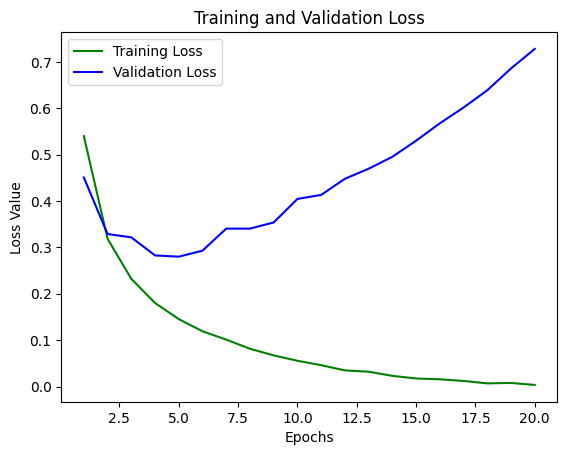

In [17]:
# Plotting losses
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'g', label="Training Loss")
plt.plot(epochs, val_loss_values, 'b', label="Validation Loss")

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()

plt.show()

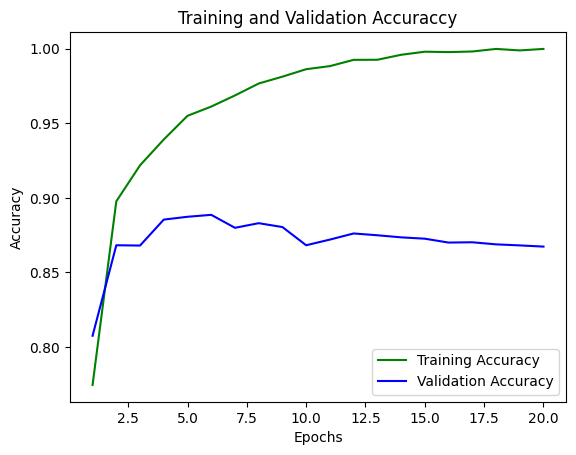

In [18]:
# Training and Validation Accuracy

acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, acc_values, 'g', label="Training Accuracy")
plt.plot(epochs, val_acc_values, 'b', label="Validation Accuracy")

plt.title('Training and Validation Accuraccy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# Re-Training Our Model

In [19]:
model.fit(
    partial_X_train,
    partial_y_train,
    epochs=3,
    batch_size=512,
    validation_data=(X_val, y_val)
)

Epoch 1/3
30/30 [==============================] - 2s 52ms/step - loss: 0.0062 - binary_accuracy: 0.9985 - val_loss: 0.7515 - val_binary_accuracy: 0.8655
Epoch 2/3
30/30 [==============================] - 1s 34ms/step - loss: 0.0020 - binary_accuracy: 0.9999 - val_loss: 0.7878 - val_binary_accuracy: 0.8634
Epoch 3/3
30/30 [==============================] - 1s 48ms/step - loss: 0.0056 - binary_accuracy: 0.9988 - val_loss: 0.8242 - val_binary_accuracy: 0.8637


# Model Evaluation

In [20]:
# Making Predictions for testing data
np.set_printoptions(suppress=True)
result = model.predict(X_test)

782/782 [==============================] - 2s 2ms/step


In [21]:
result

array([[0.00145075],
       [1.        ],
       [0.9846396 ],
       ...,
       [0.00078518],
       [0.00433184],
       [0.8283979 ]], dtype=float32)

In [22]:
y_pred = np.zeros(len(result))
for i, score in enumerate(result):
    y_pred[i] = np.round(score)

In [24]:
mae = metrics.mean_absolute_error(y_pred, y_test)
print(mae)

tf.Tensor(0.15184, shape=(), dtype=float32)
